In the universe Earth C-137, Rick discovered a special form of magnetic force between two balls if they are put in his new invented basket. Rick has n empty baskets, the ith basket is at position[i], Morty has m balls and needs to distribute the balls into the baskets such that the minimum magnetic force between any two balls is maximum.

Rick stated that magnetic force between two different balls at positions x and y is |x - y|.

Given the integer array position and the integer m. Return the required force.

 

Example 1:

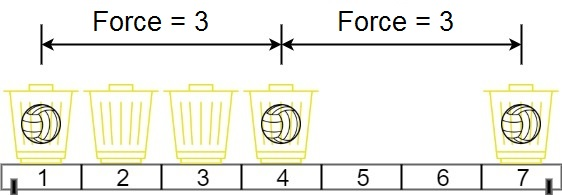

Input: position = [1,2,3,4,7], m = 3
Output: 3
Explanation: Distributing the 3 balls into baskets 1, 4 and 7 will make the magnetic force between ball pairs [3, 3, 6]. The minimum magnetic force is 3. We cannot achieve a larger minimum magnetic force than 3.

Example 2:

Input: position = [5,4,3,2,1,1000000000], m = 2
Output: 999999999
Explanation: We can use baskets 1 and 1000000000.

 

Constraints:

    n == position.length
    2 <= n <= 105
    1 <= position[i] <= 109
    All integers in position are distinct.
    2 <= m <= position.length



In [ ]:
class Solution:
    def maxDistance(self, position: List[int], m: int) -> int:
        answer = 0
        n = len(position)
        position.sort()

        # Initial search space.
        low = 1
        high = int(position[-1] / (m - 1.0)) + 1
        while low <= high:
            mid = low + (high - low) // 2
            # If we can place all balls having a gap at least 'mid',
            if self.can_place_balls(mid, position, m):
                # then 'mid' can be our answer,
                answer = mid
                # and discard the left half search space.
                low = mid + 1
            else:
                # Discard the right half search space.
                high = mid - 1
        return answer
    
    def can_place_balls(self, x, position, m):
        # Place the first ball at the first position.
        prev_ball_pos = position[0]
        balls_placed = 1

        # Iterate on each 'position' and place a ball there if we can place it.
        for i in range(1, len(position)):
            curr_pos = position[i]
            # Check if we can place the ball at the current position.
            if curr_pos - prev_ball_pos >= x:
                balls_placed += 1
                prev_ball_pos = curr_pos
            # If all 'm' balls are placed, return 'True'.
            if balls_placed == m:
                return True
        return False